# Assignment KNN and PCA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [5]:
iris = sns.load_dataset("iris")

In [6]:
iris = iris.dropna()

In [8]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [12]:
# Standardize features (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
kmeans = KMeans(n_clusters=3, random_state=42)
iris['cluster'] = kmeans.fit_predict(X_scaled)

In [14]:
# Display cluster centers (after inverse scaling for interpretability)
centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), 
                       columns=X.columns)
print("Cluster Centers:\n", centers)

Cluster Centers:
    sepal_length  sepal_width  petal_length  petal_width
0      6.314583     2.895833      4.973958     1.703125
1      5.169697     3.630303      1.493939     0.272727
2      4.747619     2.895238      1.757143     0.352381


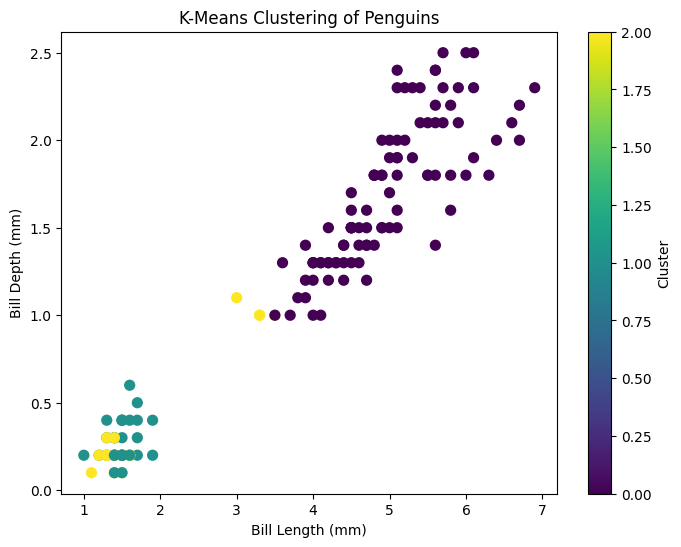

In [15]:
# Visualize the clusters
plt.figure(figsize=(8,6))
plt.scatter(iris['petal_length'], iris['petal_width'], 
            c=iris['cluster'], cmap='viridis', s=50)
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('K-Means Clustering of Penguins')
plt.colorbar(label='Cluster')
plt.show()

In [16]:
# Compare clusters with actual species
comparison = pd.crosstab(iris['species'], iris['cluster'])
print("\nCluster vs Actual Species:\n", comparison)


Cluster vs Actual Species:
 cluster      0   1   2
species               
setosa       0  33  17
versicolor  46   0   4
virginica   50   0   0


In [17]:
from sklearn.metrics import silhouette_score

In [18]:
from sklearn.metrics import silhouette_score

In [19]:
#elbow method

inertia = []
K = range(2, 10) 

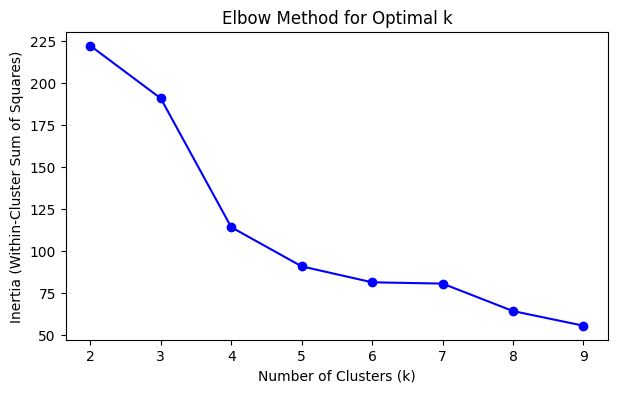

In [20]:
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [21]:
#Silhouette Scores
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(sil_score)

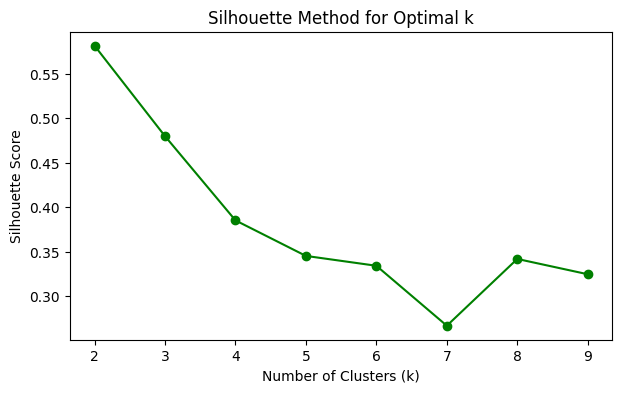

In [22]:
plt.figure(figsize=(7, 4))
plt.plot(K, silhouette_scores, 'go-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

# PCA

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [26]:
iris = sns.load_dataset("iris")

In [27]:
iris = iris.dropna()

In [28]:
X = iris.select_dtypes(include=['float64', 'int64'])
y = iris['species']

In [29]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

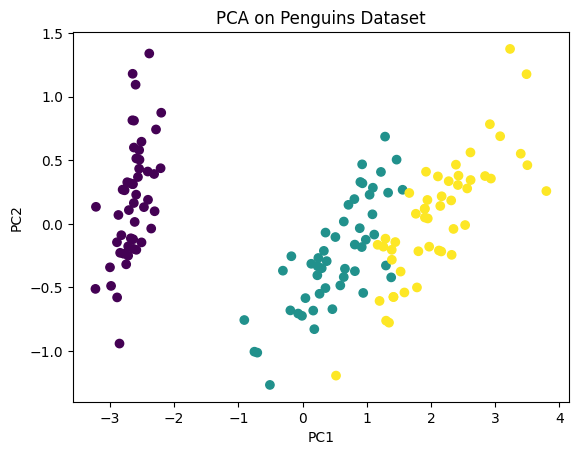

In [30]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.astype('category').cat.codes)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA on Penguins Dataset')
plt.show()

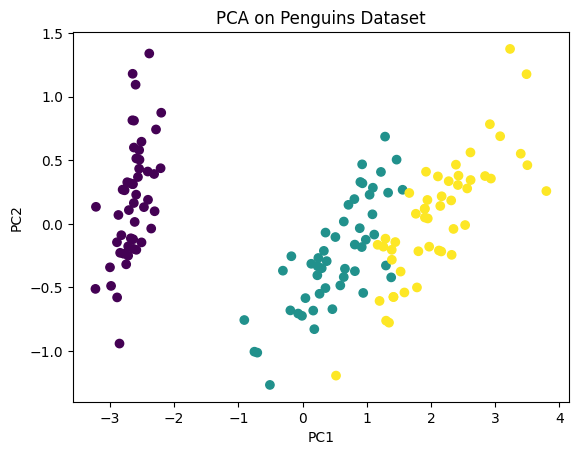

In [31]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.astype('category').cat.codes)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA on Penguins Dataset')
plt.show()

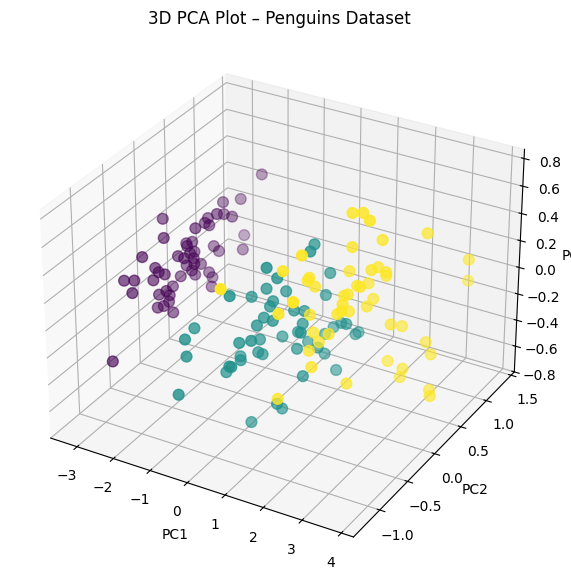

In [32]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# 3D Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
    c=y.astype('category').cat.codes, s=60
)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Plot – Penguins Dataset')

plt.show()
